In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirpath , dirnames , filenames in os.walk('/kaggle/input/food-101'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

There are 1 dir and 0 files is /kaggle/input/
There are 1 dir and 1 files is /kaggle/input/food-101
There are 2 dir and 0 files is /kaggle/input/food-101/food-101
There are 1 dir and 1 files is /kaggle/input/food-101/food-101/__MACOSX
There are 2 dir and 5 files is /kaggle/input/food-101/food-101/__MACOSX/food-101
There are 0 dir and 6 files is /kaggle/input/food-101/food-101/__MACOSX/food-101/meta
There are 101 dir and 102 files is /kaggle/input/food-101/food-101/__MACOSX/food-101/images
There are 0 dir and 1000 files is /kaggle/input/food-101/food-101/__MACOSX/food-101/images/macarons
There are 0 dir and 1000 files is /kaggle/input/food-101/food-101/__MACOSX/food-101/images/french_toast
There are 0 dir and 1000 files is /kaggle/input/food-101/food-101/__MACOSX/food-101/images/lobster_bisque
There are 0 dir and 1000 files is /kaggle/input/food-101/food-101/__MACOSX/food-101/images/prime_rib
There are 0 dir and 1000 files is /kaggle/input/food-101/food-101/__MACOSX/food-101/images/pork

In [28]:
import os
for dirpath , dirnames , filenames in os.walk('/kaggle/input/food-101/food-101/food-101/meta'):
    print(filenames)

['test.txt', 'train.json', 'labels.txt', 'test.json', 'train.txt', 'classes.txt']


In [29]:
train_data = open("/kaggle/input/food-101/food-101/food-101/meta/train.txt", 'r').read().splitlines()
test_data = open("/kaggle/input/food-101/food-101/food-101/meta/test.txt", 'r').read().splitlines()
len(train_data) , len(test_data) , train_data[:10]

(75750,
 25250,
 ['apple_pie/1005649',
  'apple_pie/1014775',
  'apple_pie/1026328',
  'apple_pie/1028787',
  'apple_pie/1043283',
  'apple_pie/1050519',
  'apple_pie/1057749',
  'apple_pie/1057810',
  'apple_pie/1072416',
  'apple_pie/1074856'])

In [30]:
labels_name = open("/kaggle/input/food-101/food-101/food-101/meta/labels.txt", 'r').read().splitlines()
len(labels_name) , labels_name[:10]

(101,
 ['Apple pie',
  'Baby back ribs',
  'Baklava',
  'Beef carpaccio',
  'Beef tartare',
  'Beet salad',
  'Beignets',
  'Bibimbap',
  'Bread pudding',
  'Breakfast burrito'])

In [31]:
import json

# Path to the train.json file
path = "/kaggle/input/food-101/food-101/food-101/meta/train.json"

# Load JSON data
with open(path, 'r') as f:
    train_dict = json.load(f)

# Check how many classes exist
print(f"Total classes in train.json: {len(train_dict)}")


Total classes in train.json: 101


In [32]:
print(list(train_dict.keys())[:10])  # show first 10 class names


['churros', 'hot_and_sour_soup', 'samosa', 'sashimi', 'pork_chop', 'spring_rolls', 'panna_cotta', 'beef_tartare', 'greek_salad', 'foie_gras']


In [33]:
food_type = "churros"
churros_images = train_dict[food_type]

print(f"{food_type} has {len(churros_images)} training images.")
print(churros_images[:5])  # show first 5 image paths


churros has 750 training images.
['churros/1004234', 'churros/1013460', 'churros/1016791', 'churros/102100', 'churros/1025494']


In [34]:
from pathlib import Path

img_root_dir = "/kaggle/input/food-101/food-101/food-101/images/"



train_img_dir = []

for img in train_data:
    img_dir = img_root_dir + img + '.jpg'
    train_img_dir.append(Path(img_dir))

train_img_dir[:5] , len(train_img_dir)

([PosixPath('/kaggle/input/food-101/food-101/food-101/images/apple_pie/1005649.jpg'),
  PosixPath('/kaggle/input/food-101/food-101/food-101/images/apple_pie/1014775.jpg'),
  PosixPath('/kaggle/input/food-101/food-101/food-101/images/apple_pie/1026328.jpg'),
  PosixPath('/kaggle/input/food-101/food-101/food-101/images/apple_pie/1028787.jpg'),
  PosixPath('/kaggle/input/food-101/food-101/food-101/images/apple_pie/1043283.jpg')],
 75750)

In [35]:
test_img_dir = []

for img in test_data: 
    img_dir = img_root_dir + img + '.jpg'
    test_img_dir.append(Path(img_dir))

test_img_dir[:5] , len(test_img_dir)

([PosixPath('/kaggle/input/food-101/food-101/food-101/images/apple_pie/1011328.jpg'),
  PosixPath('/kaggle/input/food-101/food-101/food-101/images/apple_pie/101251.jpg'),
  PosixPath('/kaggle/input/food-101/food-101/food-101/images/apple_pie/1034399.jpg'),
  PosixPath('/kaggle/input/food-101/food-101/food-101/images/apple_pie/103801.jpg'),
  PosixPath('/kaggle/input/food-101/food-101/food-101/images/apple_pie/1038694.jpg')],
 25250)

In [36]:
test_img_dir[0].parent.stem

'apple_pie'

In [37]:
classes = open("/kaggle/input/food-101/food-101/food-101/meta/classes.txt", 'r').read().splitlines()
len(classes) , classes[:5]

(101,
 ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare'])

In [38]:
class_to_idx = {class_name : i for i , class_name in enumerate(classes)}
class_to_idx.values()


dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100])

In [39]:
import random
import PIL
from PIL import Image
import matplotlib.pyplot as plt



def visualize_random_images(directory_path : str , n : int = 16) -> None:
    rand_img_path = random.sample(directory_path , n)
    row , col = 4 ,4
    fig = plt.figure(figsize=(14,8))

    for i, img_path in enumerate(rand_img_path):
        with Image.open(img_path) as f:
        
            plt.subplot(row,col, i + 1 )
            plt.imshow(f)
            plt.axis('off')
            lbl_name = img_path.parent.name
            indx = class_to_idx[lbl_name]
            
            plt.title(f"{labels_name[indx]} | size : {f.size} ")
    
    fig.tight_layout()
    

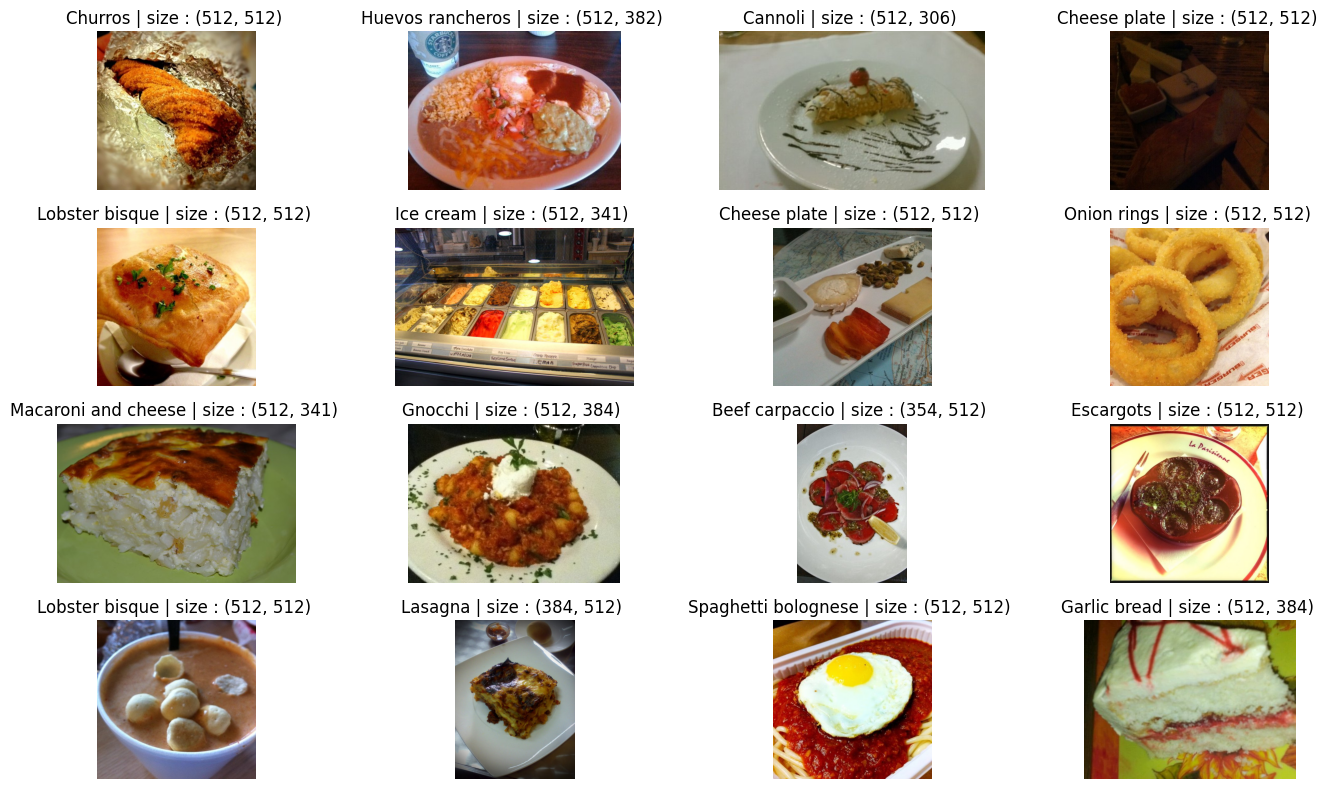

In [40]:
# random.seed(42)
visualize_random_images(train_img_dir )

In [41]:
import numpy as np
img = Image.open(train_img_dir[0])

img = np.asarray(img)
img.shape

(512, 308, 3)

## Transform

In [42]:
train_transform = v2.Compose([
    v2.Resize((256, 256), antialias=True),
    v2.RandomResizedCrop(224, scale=(0.8, 1.0)),
    v2.RandomHorizontalFlip(0.6),
    v2.TrivialAugmentWide(num_magnitude_bins=31),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.485, 0.456, 0.406),
                 std=(0.229, 0.224, 0.225)),  
])

test_transform = v2.Compose([
    v2.Resize((256, 256)),
    v2.CenterCrop(224),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.485, 0.456, 0.406),
                 std=(0.229, 0.224, 0.225)),  
])


## visualizing transformed img

In [43]:
def plot_transformed_img(img_dir :list[str] , transform : torchvision.transforms, n : int = 4) -> None:
    rand_img_path = random.sample(img_dir, 4)

    for img_path in rand_img_path:
        with Image.open(img_path) as f:
            fig, ax  = plt.subplots(1,2)
            ax[0].imshow(f)

            ax[0].set_title(f'Original size : {f.size}')
            ax[0].axis(False)

            transformed_img = transform(f).permute(1,2,0)

            ax[1].imshow(transformed_img)
            ax[1].set_title(f'Transformed img shape: \n {transformed_img.shape}')
            ax[1].axis("off")

            fig.suptitle(f"Class : {img_path.parent.stem}")
        fig.tight_layout()


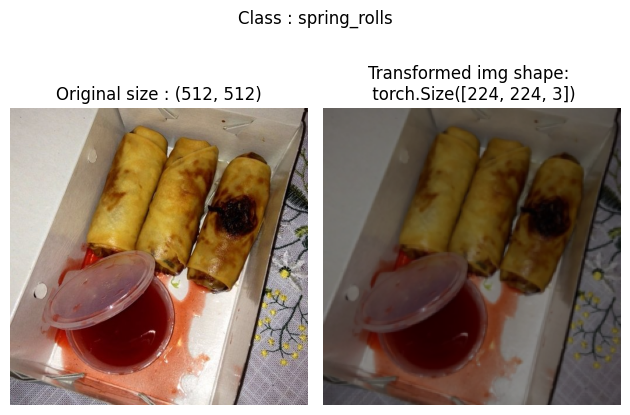

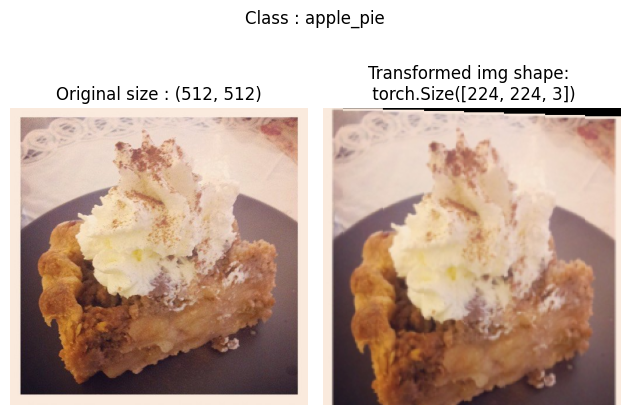

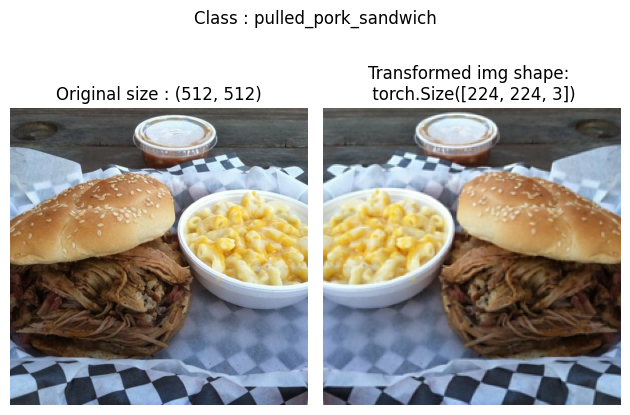

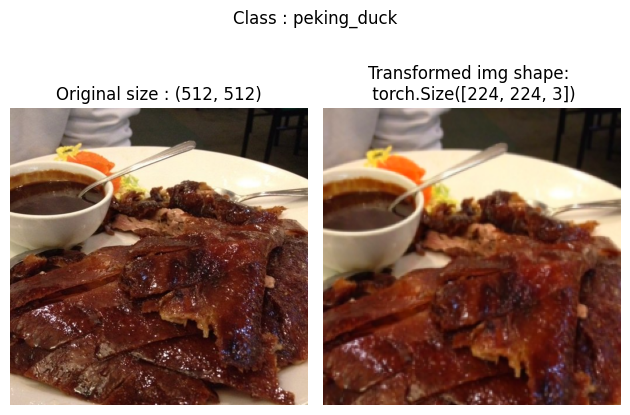

In [44]:
# random.seed(42)
plot_transformed_img(train_img_dir, train_transform)

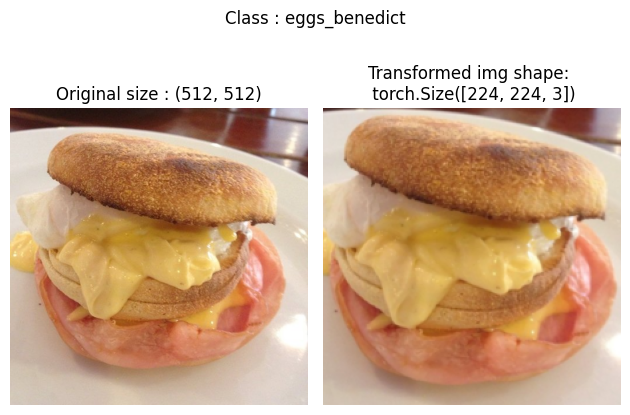

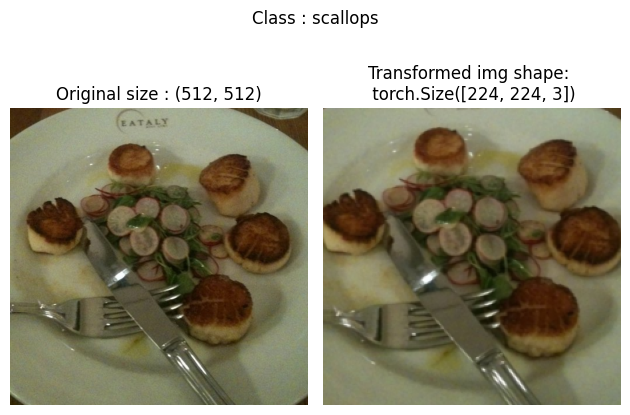

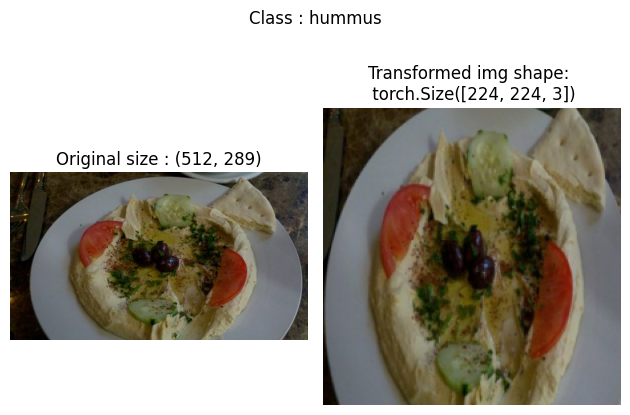

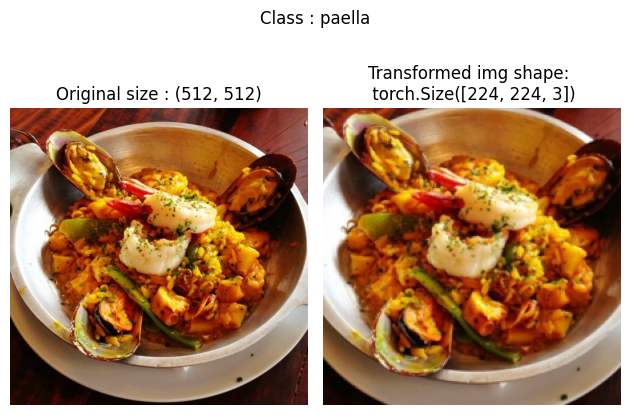

In [45]:
# random.seed(42)
plot_transformed_img(test_img_dir, test_transform)

### custom dataset

In [75]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    def __init__(self , paths : list[str], transform : torchvision.transforms = None ):
        self.path = sorted(paths)
        self.transform = transform
        self.classes , self.class_to_idx = classes , class_to_idx

        # Build targets list (class indices for each image)
        self.targets = [self.class_to_idx[p.parent.name] for p in self.path]

        # Optional: store (path, label) pairs like torchvision.datasets.ImageFolder
        self.samples = list(zip(self.path, self.targets))

    def load_image(self, indx: int) -> Image.Image:
        image_path = self.path[indx]
        img = Image.open(image_path)
        # Force 3 channels (RGB)
        if img.mode != "RGB":
            img = img.convert("RGB")
        return img   
        
    def __len__(self) -> int:
        return len(self.path)

    def __getitem__(self, indx : int) -> tuple[torch.Tensor, int]:
        img = self.load_image(indx)

        class_name = self.path[indx].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img) , class_idx
        else :
            return img , class_idx
    
    

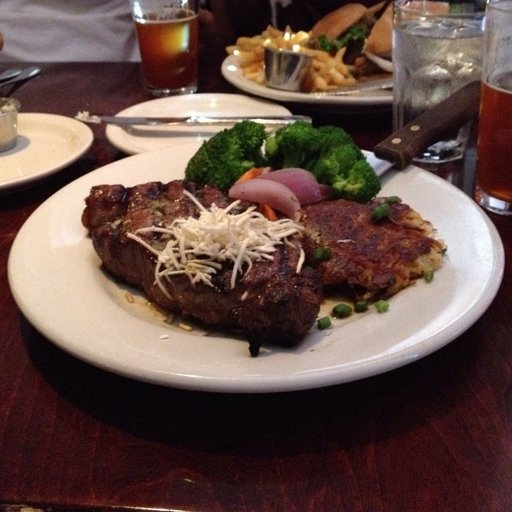

In [76]:
train_data_custom = ImageFolderCustom(train_img_dir, None)
img , label = train_data_custom[70001]
img

In [48]:
label , classes[label]

(93, 'steak')

In [79]:
train_data = ImageFolderCustom(train_img_dir , train_transform)
test_data = ImageFolderCustom(test_img_dir, test_transform)
np.unique(train_data.targets)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
img , label = train_data[0]
img.shape , label, img

In [50]:
train_data.class_to_idx

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheesecake': 16,
 'cheese_plate': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

### dataset to dataloader

In [51]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64
NUM_WORKERS = 2

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = NUM_WORKERS
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False,
    num_workers = NUM_WORKERS
)

train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bde36a59010>,
 <torch.utils.data.dataloader.DataLoader at 0x7bdd58c23d50>)

In [52]:
##testing dataloader
img_batch , label_batch = next(iter(train_dataloader))

img_batch.shape , label_batch.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

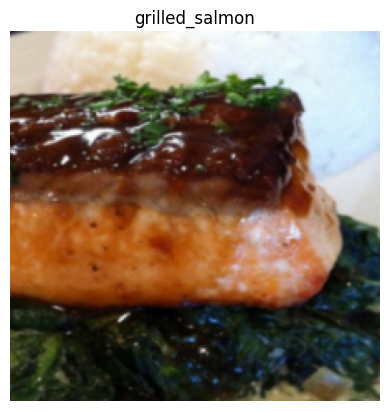

In [53]:
plt.imshow(img_batch[0].permute(1,2,0))
plt.title(classes[label_batch[0]])
plt.axis('off')
plt.show()

## Creating model

In [54]:
#using resnet50
import torchvision.models as models

food101Model_0 = models.resnet50(weights = models.ResNet50_Weights.IMAGENET1K_V1)

print(food101Model_0)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 225MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [55]:
food101Model_0.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [56]:
from torch import nn

num_features = food101Model_0.fc.in_features

food101Model_0.fc = nn.Linear(num_features , len(classes))

In [57]:
# # freeze all
# for param in model.parameters():
#     param.requires_grad = False

# # unfreeze the final layer
# for param in model.fc.parameters():
#     param.requires_grad = True


In [58]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [59]:
food101Model_0 = food101Model_0.to(device)

In [60]:
### quick check model
x = torch.randn(64, 3, 224, 224)
out = food101Model_0(x.to('cuda'))
print(out.shape)


torch.Size([64, 101])


## creating train and test loop

In [61]:
def train_step(
    model : torch.nn.Module,
    optimizer : torch.optim.Optimizer,
    dataloader : torch.utils.data.DataLoader,
    loss_fn : torch.nn.Module,
    device : torch.device = device) -> tuple[float , float]:
  model.to(device)

  model.train()

  train_loss , train_acc = 0,0;

  for batch , (X, y) in enumerate(dataloader):
    X , y = X.to(device) , y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)

    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)

    train_acc += (y == y_pred_class).sum().item() / len(y)

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc

In [62]:
def test_step(
    model : torch.nn.Module,
    loss_fn : torch.nn.Module,
    dataloader : torch.utils.data.DataLoader,
    device : torch.device = device) -> tuple[float , float]:

  model.to(device)
  model.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X , y = X.to(device), y.to(device)

      test_pred = model(X)
      loss = loss_fn(test_pred, y)

      test_loss += loss.item()

      test_pred_class = torch.argmax(torch.softmax(test_pred, dim = 1) , dim = 1)

      test_acc += (y == test_pred_class).sum().item() / len(y)

  test_loss /= len(dataloader)
  test_acc /= len(dataloader)

  return test_loss, test_acc



In [63]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)

        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [64]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(food101Model_0.parameters(), lr=1e-4, weight_decay=1e-4)


In [65]:
from timeit import default_timer as timer
torch.manual_seed(42)

start_time = timer()

food101Model_0_results = train(
    model = food101Model_0,
    train_dataloader= train_dataloader,
    test_dataloader= test_dataloader,
    optimizer = optimizer,
    loss_fn = loss_fn)

end_time = timer()
food101Model_0_time = end_time-start_time
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [71]:
def plot_loss_curve(results : dict[str, list[float]]) -> None:
  train_loss = results['train_loss']
  test_loss = results['test_loss']

  train_acc = results['train_acc']
  test_acc = results['test_acc']

  epoch = range(len(train_loss))

  plt.figure(figsize=(12,4))

  plt.subplot(1,2,1)
  plt.plot(epoch , train_loss , label = 'train_loss')
  plt.plot(epoch , test_loss, label = 'test_loss')
  plt.legend()
  plt.title('Loss over epoch')

  plt.subplot(1,2,2)
  plt.plot(epoch, train_acc, label = 'Train Accuracy')
  plt.plot(epoch, test_acc, label = 'Test Accuracy')
  plt.legend()
  plt.title('Accuracy over epoch')

plt.show()

In [ ]:
plot_loss_curve(food101Model_0_results)

In [ ]:
import torch

# Save
torch.save(food101Model_0.state_dict(), "food101_resnet50_model_0_state_dict.pth")

# Later, to load
from torchvision import models
import torch.nn as nn

# Recreate the model structure first
model = models.resnet50(weights=None)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(classes))

# Load weights
model.load_state_dict(torch.load("food101_resnet50_model_0_state_dict.pth"))
model.eval()  # Set to evaluation mode


In [ ]:
# Save
torch.save(food101Model_0, "food101_resnet50_model_0_full.pth")

# Load
# model = torch.load("food101_resnet50_model_0_full.pth")
# model.eval()


In [66]:


def train_with_freeze(model, train_dataloader, test_dataloader, optimizer, 
          loss_fn=nn.CrossEntropyLoss(), epochs=15, freeze_epochs=5):
    
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    for epoch in tqdm(range(epochs)):
        # === Unfreeze backbone after freeze_epochs ===
        if epoch == freeze_epochs:
            print(f"\n Unfreezing backbone at epoch {epoch}...\n")
            for name, param in model.named_parameters():
                if "layer4" in name or "layer3" in name or "fc" in name:
                    param.requires_grad = True
            # Recreate optimizer to include all trainable params
            optimizer = torch.optim.Adam(
                filter(lambda p: p.requires_grad, model.parameters()), 
                lr=1e-4   # smaller LR for fine-tuning
            )

        # === Train and test steps ===
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        print(f"Epoch: {epoch+1} | "
              f"train_loss: {train_loss:.4f} | train_acc: {train_acc:.4f} | "
              f"test_loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")

        results["train_loss"].append(float(train_loss))
        results["train_acc"].append(float(train_acc))
        results["test_loss"].append(float(test_loss))
        results["test_acc"].append(float(test_acc))

    return results


In [67]:
food101Model_1 = models.resnet50(weights = models.ResNet50_Weights.IMAGENET1K_V2)

food101Model_1.fc = nn.Linear(food101Model_1.fc.in_features , len(classes))

food101Model_1 = food101Model_1.to(device)

# freeze all
for param in food101Model_1.parameters():
    param.requires_grad = False

# unfreeze the final layer
for param in food101Model_1.fc.parameters():
    param.requires_grad = True


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 219MB/s]


In [68]:
from timeit import default_timer as timer
torch.manual_seed(42)

start_time = timer()

optimizer = torch.optim.Adam(food101Model_1.fc.parameters(), lr=1e-3)

food101Model_1_results = train_with_freeze(
    model=food101Model_1,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    epochs=15,          # total
    freeze_epochs=5     # first 5 = frozen head-only training
)


end_time = timer()

food101Model_1_time = end_time-start_time

print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.6381 | train_acc: 0.4238 | test_loss: 1.6493 | test_acc: 0.6118
Epoch: 2 | train_loss: 1.8859 | train_acc: 0.5496 | test_loss: 1.4029 | test_acc: 0.6521
Epoch: 3 | train_loss: 1.7003 | train_acc: 0.5819 | test_loss: 1.3101 | test_acc: 0.6655
Epoch: 4 | train_loss: 1.5984 | train_acc: 0.6033 | test_loss: 1.2467 | test_acc: 0.6785
Epoch: 5 | train_loss: 1.5256 | train_acc: 0.6171 | test_loss: 1.2317 | test_acc: 0.6803

 Unfreezing backbone at epoch 5...

Epoch: 6 | train_loss: 1.0506 | train_acc: 0.7240 | test_loss: 0.6887 | test_acc: 0.8105
Epoch: 7 | train_loss: 0.7746 | train_acc: 0.7914 | test_loss: 0.6268 | test_acc: 0.8244
Epoch: 8 | train_loss: 0.6218 | train_acc: 0.8295 | test_loss: 0.6143 | test_acc: 0.8303
Epoch: 9 | train_loss: 0.5152 | train_acc: 0.8557 | test_loss: 0.5937 | test_acc: 0.8365
Epoch: 10 | train_loss: 0.4289 | train_acc: 0.8790 | test_loss: 0.6117 | test_acc: 0.8355
Epoch: 11 | train_loss: 0.3664 | train_acc: 0.8947 | test_loss: 0.6129 |

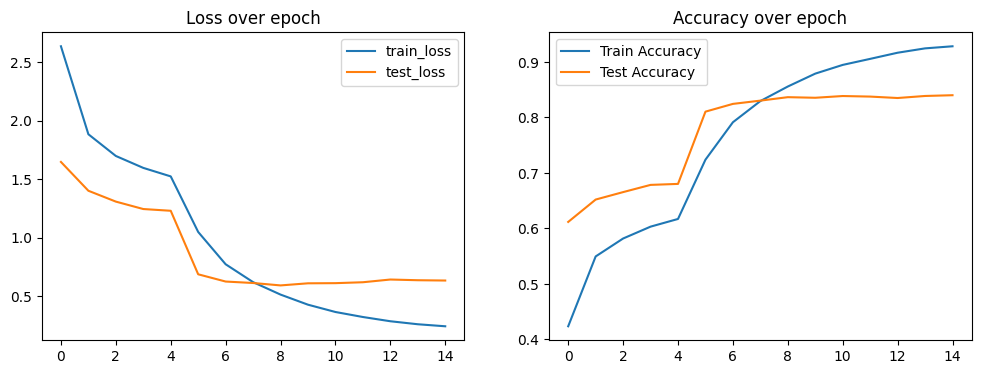

In [72]:
plot_loss_curve(food101Model_1_results)

In [ ]:
import pandas as pd

def collect_model_results(model_results_dict ) -> pd.DataFrame:
    """
    Combine multiple model results into a DataFrame.
    Each entry should contain the final train/test metrics and training time.

    Args:
        model_results_dict (dict): 
            Keys = model names (e.g., "resnet50", "mobilenet_v3")
            Values = dict with:
                - "results" : result dict from training (with 'train_loss', 'train_acc', 'test_loss', 'test_acc')
                - "time" : float (training time in seconds)

    Returns:
        pd.DataFrame
    """
    records = []
    for model_name, info in model_results_dict.items():
        res = info["results"]
        time_ = info["time"]

        # Get the last epoch values
        final_train_loss = res["train_loss"][-1]
        final_train_acc  = res["train_acc"][-1]
        final_test_loss  = res["test_loss"][-1]
        final_test_acc   = res["test_acc"][-1]

        records.append({
            "model_name": model_name,
            "final_train_loss": final_train_loss,
            "final_train_acc": final_train_acc,
            "final_test_loss": final_test_loss,
            "final_test_acc": final_test_acc,
            "total_time_sec": time_
        })

    return pd.DataFrame(records)


In [ ]:
all_results = {
    "food101Model_0": {"results": food101Model_0_results, "time": food101Model_0_time},
    "food101Model_1": {"results": food101Model_1_results, "time": food101Model_1_time},
}

summary_df = collect_model_results(all_results)
print(summary_df)


In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

In [ ]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher